In [1]:
#   Imports

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import bruges as br

path = "/home/billy/python/SEAM/SEAM/"

In [2]:
ref_gathers = np.load(path + 'data/reflectivity_gathers.npy')

In [3]:
shape = ref_gathers.shape
shape

(1751, 46, 5000)

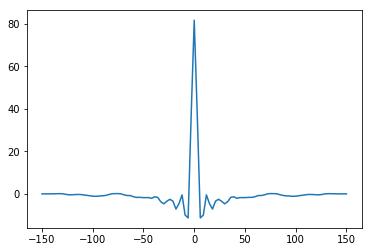

In [4]:
#w, t = br.filters.ricker(0.3, 0.004, 25 ,return_t=True)
cvg_w = np.genfromtxt(path + 'data/near_0-1998_300-50.dat')
w, t = cvg_w[:,1], cvg_w[:,0]
plt.plot(t, w)

In [5]:
def make_syn(rc, w):
    func = lambda tr: np.convolve(tr, w, mode='same')
    syn = np.apply_along_axis(func, arr=rc, axis=-1)
    return syn.T

In [6]:
seis_gather = []

for i in tqdm(range(shape[0])):
    
    test = make_syn(ref_gathers[i,:,:].real, w)
    
    seis_gather.append(test)
              
stack = np.stack(seis_gather)
              
stack.shape

100%|██████████| 1751/1751 [00:15<00:00, 114.43it/s]


(1751, 5000, 46)

In [8]:
np.save(arr=stack, file=path + 'data/cvgwavelet_synth')

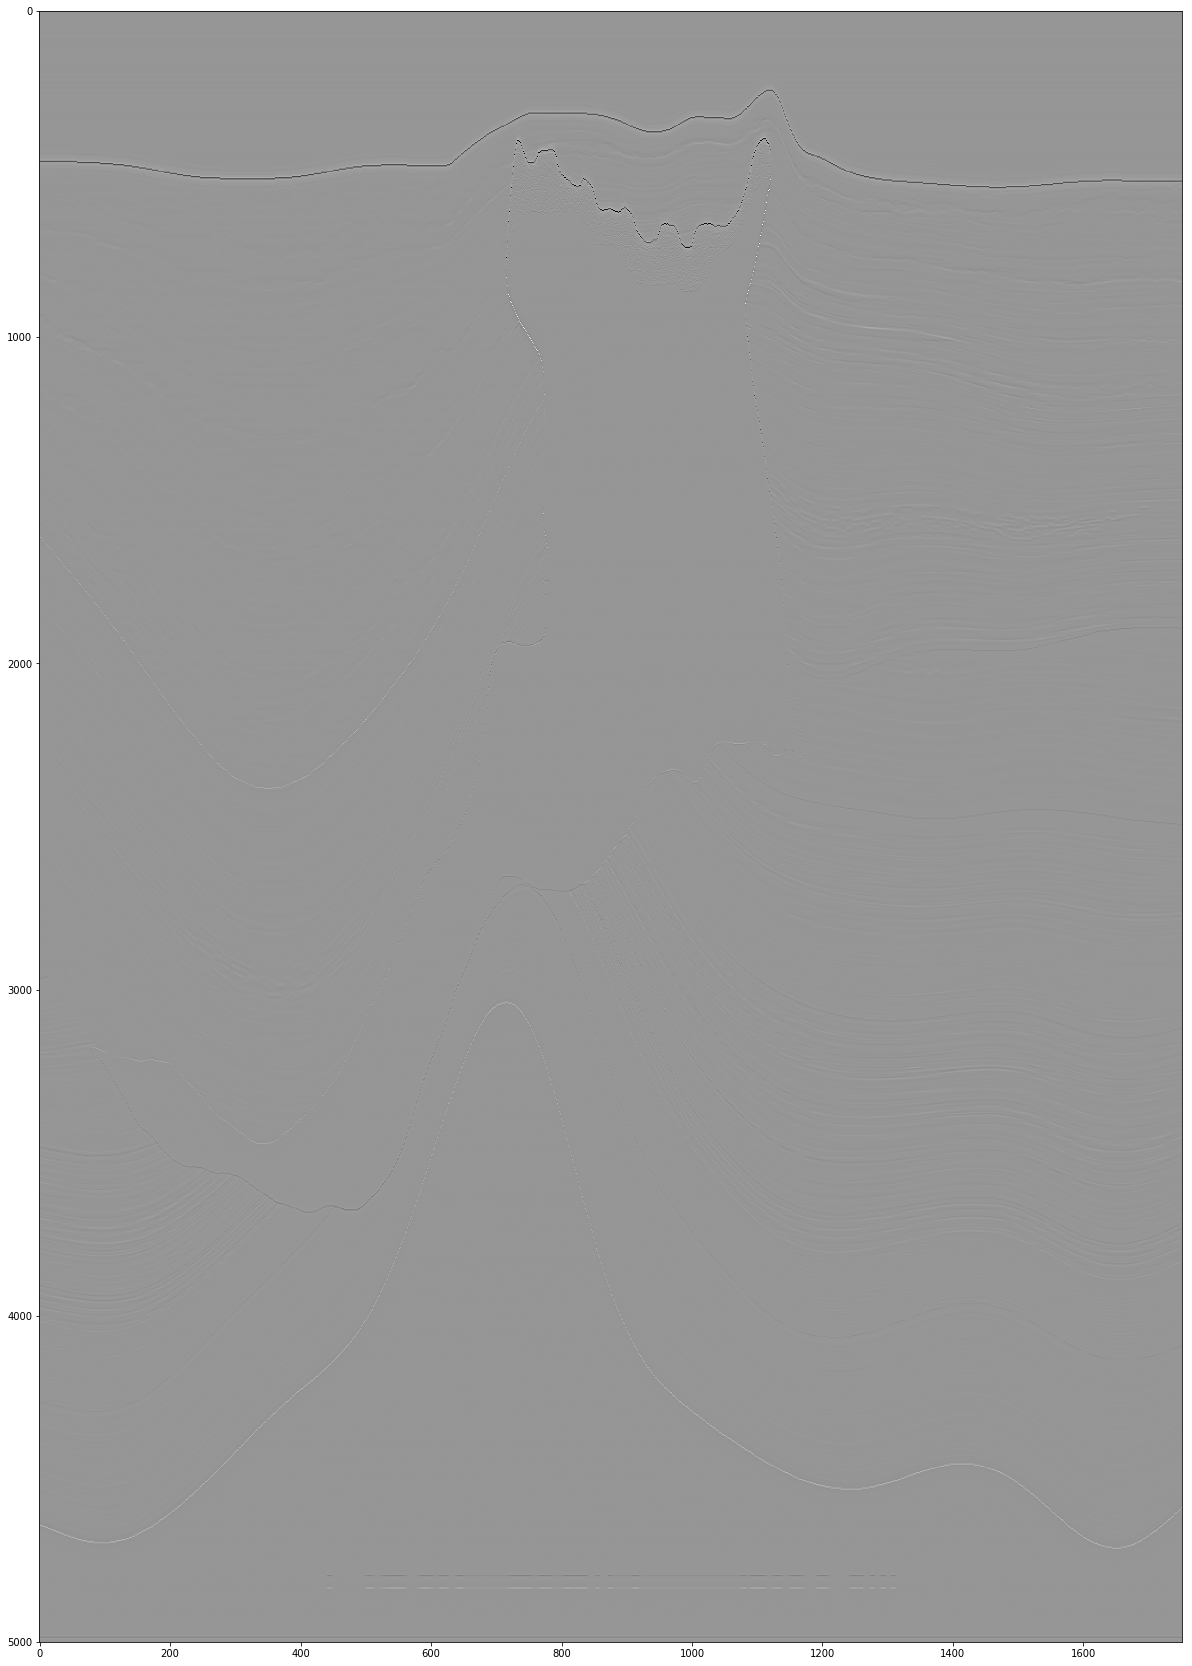

In [9]:
plt.figure(figsize=(30,30))
plt.imshow(stack[:,:,0].T, aspect=.5, cmap='Greys', vmin=-30, vmax=30)